#### Case Study: Analyzing KPIs for a Retail Company's Marketing Department

Objective: The marketing department of a retail company wants to assess the effectiveness of its online marketing campaigns and website performance. The goal is to analyze KPIs related to website traffic and sales.

Data Generation: We'll use Python's Faker library to generate a sample dataset. We'll generate data for two years (24 months) to have sufficient data for analysis.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from faker import Faker
import random

fake = Faker()

# Generate dataset
data = []
for _ in range(24):  # 24 months
    month = fake.date_between(start_date='-2y', end_date='now')
    visitors = random.randint(10000, 30000)
    conversions = random.randint(500, 2000)
    revenue = round(random.uniform(50000, 150000), 2)
    data.append([month, visitors, conversions, revenue])

df = pd.DataFrame(data, columns=["Month", "Visitors", "Conversions", "Revenue"])

In [2]:
# Save the dataset as a CSV file
df.to_csv("marketing_kpis.csv", index=False)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Month        24 non-null     object 
 1   Visitors     24 non-null     int64  
 2   Conversions  24 non-null     int64  
 3   Revenue      24 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 896.0+ bytes


In [4]:
df.head()

,Month,Visitors,Conversions,Revenue
0,2023-02-06,19060,1918,149737.05
1,2023-01-11,20053,1973,106090.59
2,2022-02-05,16972,1842,77621.19
3,2022-08-05,23526,1034,67100.04
4,2022-05-11,12539,1012,121975.67


In [5]:
df.tail()

,Month,Visitors,Conversions,Revenue
19,2022-05-21,25740,1068,96266.30
20,2022-05-22,29245,565,144168.20
21,2021-12-12,13342,1761,53356.12
22,2023-09-21,10948,1195,92035.70
23,2021-12-18,24568,833,97491.11


In [6]:
df.describe()

,Visitors,Conversions,Revenue
count,24.000000,24.000000,24.000000
mean,18540.041667,1349.083333,96895.529167
std,6001.276875,486.705064,32203.291242
min,10451.000000,565.000000,52701.050000
25%,12413.000000,987.000000,72521.047500
50%,18981.500000,1348.500000,94151.000000
75%,24608.500000,1827.000000,122785.782500
max,29245.000000,1973.000000,149737.050000


In [41]:
# Create a heatmap to visualize correlations
df.corr().style.background_gradient(cmap="Blues")

,Visitors,Conversions,Revenue,Conversion Rate,YoY Visitors Growth,YoY Conversions Growth,YoY Revenue Growth
Visitors,1.000000,-0.428609,-0.043550,-0.799999,0.530241,-0.379880,0.363978
Conversions,-0.428609,1.000000,0.307943,0.817862,-0.461749,0.739941,0.198242
Revenue,-0.043550,0.307943,1.000000,0.287896,-0.032999,-0.173297,0.827085
Conversion Rate,-0.799999,0.817862,0.287896,1.000000,-0.559328,0.559286,-0.074290
YoY Visitors Growth,0.530241,-0.461749,-0.032999,-0.559328,1.000000,-0.374222,-0.219233
YoY Conversions Growth,-0.379880,0.739941,-0.173297,0.559286,-0.374222,1.000000,0.240077
YoY Revenue Growth,0.363978,0.198242,0.827085,-0.074290,-0.219233,0.240077,1.000000


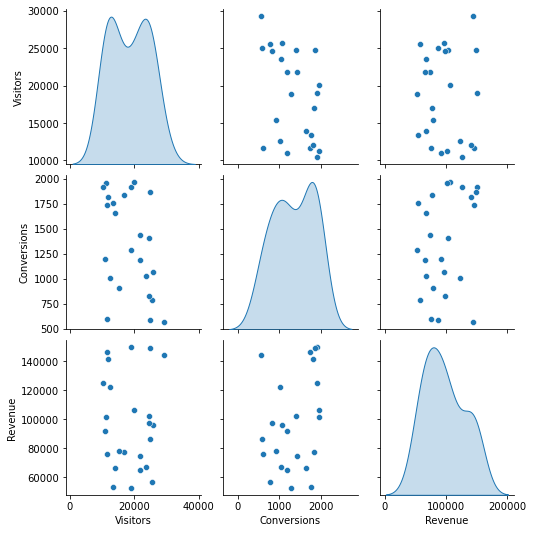

In [18]:
# Create a pair plot to visualize correlations
sns.pairplot(df, vars=["Visitors", "Conversions", "Revenue"], kind='scatter', diag_kind='kde')
plt.show()

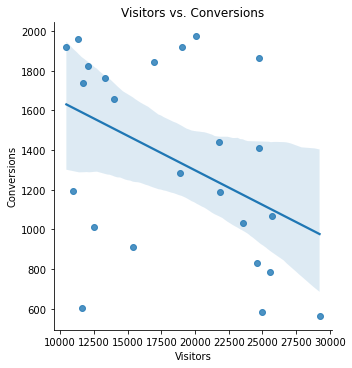

In [32]:
# Visualization 1: Visitors vs. Conversions with Regression Line
sns.lmplot(x="Visitors", y="Conversions", data=df);
plt.title("Visitors vs. Conversions")
plt.show()

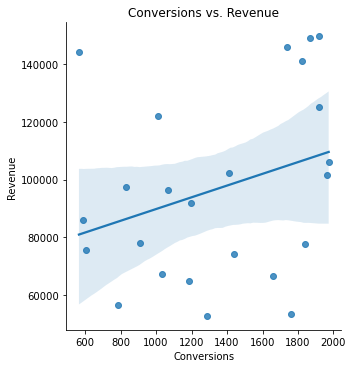

In [31]:
# Visualization 2: Conversions vs. Revenue with Regression Line
sns.lmplot(x="Conversions", y="Revenue", data=df)
plt.title("Conversions vs. Revenue")
plt.show()

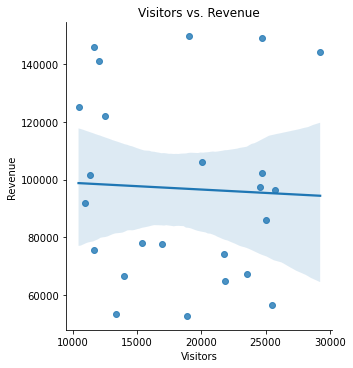

In [33]:
# Visualization 3: Visitors vs. Revenue with Regression Line
sns.lmplot(x="Visitors", y="Revenue", data=df)
plt.title("Visitors vs. Revenue")
plt.show()

- Monthly Website Visitors:

Calculate average monthly visitors.
Visualize monthly visitor trends using a line chart.

In [8]:
# Average monthly visitors
average_visitors = df["Visitors"].mean()
print(average_visitors)

18540.041666666668


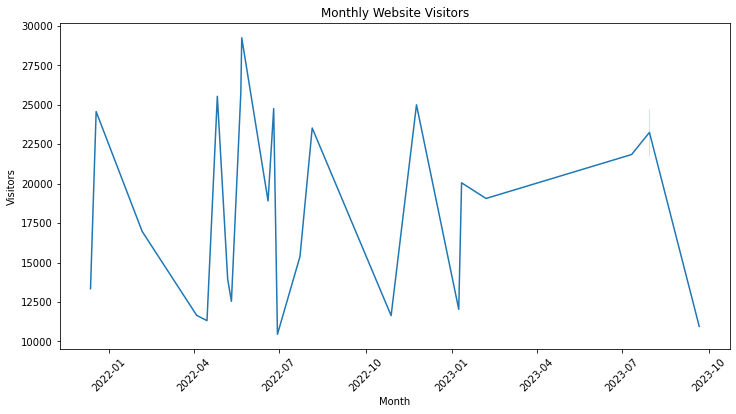

In [9]:
# Plot 1: Monthly Website Visitors
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Visitors")
plt.title("Monthly Website Visitors")
plt.xlabel("Month")
plt.ylabel("Visitors")
plt.xticks(rotation=45)
plt.show()

- Monthly Conversions:

Calculate the average monthly conversions.
Visualize monthly conversion trends using a line chart.

In [10]:
# Average monthly conversions
average_conversions = df["Conversions"].mean()
print(average_conversions)

1349.0833333333333


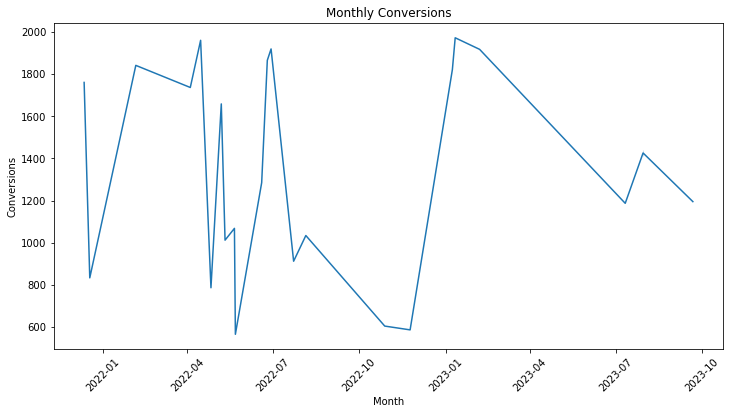

In [11]:
# Plot 2: Monthly Conversions
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Conversions")
plt.title("Monthly Conversions")
plt.xlabel("Month")
plt.ylabel("Conversions")
plt.xticks(rotation=45)
plt.show()

- Monthly Revenue:

Calculate the average monthly revenue.
Visualize monthly revenue trends using a line chart.

In [12]:
# Average monthly revenue
average_revenue = df["Revenue"].mean()
print(average_revenue)

96895.52916666666


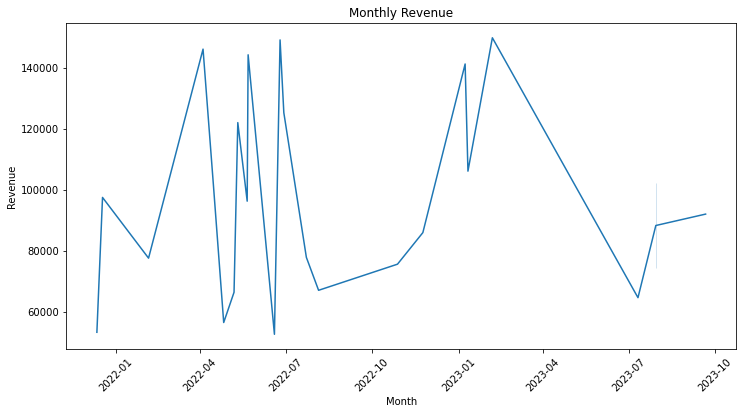

In [13]:
# Plot 3: Monthly Revenue
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Revenue")
plt.title("Monthly Revenue")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

- Conversion Rate:

Calculate the conversion rate (conversions/visitors).
Visualize the monthly conversion rate.

In [14]:
# Calculate conversion rate
df["Conversion Rate"] = (df["Conversions"] / df["Visitors"]) * 100
print(df["Conversion Rate"])

0     10.062959
1      9.838927
2     10.853170
3      4.395137
4      8.070819
5      3.077887
6     17.329445
7     18.371448
8      6.616431
9      5.190341
10    14.906033
11     5.927852
12     2.344375
13     5.709664
14     5.433738
15    11.885657
16     6.797863
17     7.536958
18    15.139177
19     4.149184
20     1.931954
21    13.198921
22    10.915236
23     3.390589
Name: Conversion Rate, dtype: float64


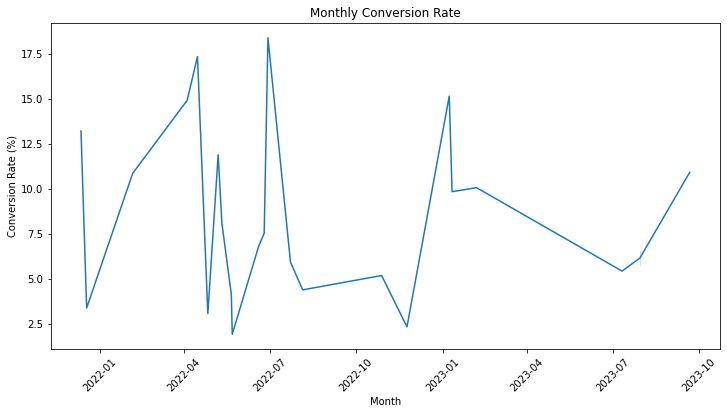

In [15]:
# Plot 4: Monthly Conversion Rate
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Month", y="Conversion Rate")
plt.title("Monthly Conversion Rate")
plt.xlabel("Month")
plt.ylabel("Conversion Rate (%)")
plt.xticks(rotation=45)
plt.show()

- Year-over-Year Growth:

Calculate year-over-year growth for visitors, conversions, and revenue.
Visualize YoY growth using bar charts.

In [16]:
# Calculate YoY growth
df["YoY Visitors Growth"] = df["Visitors"].pct_change(periods=12) * 100
df["YoY Conversions Growth"] = df["Conversions"].pct_change(periods=12) * 100
df["YoY Revenue Growth"] = df["Revenue"].pct_change(periods=12) * 100

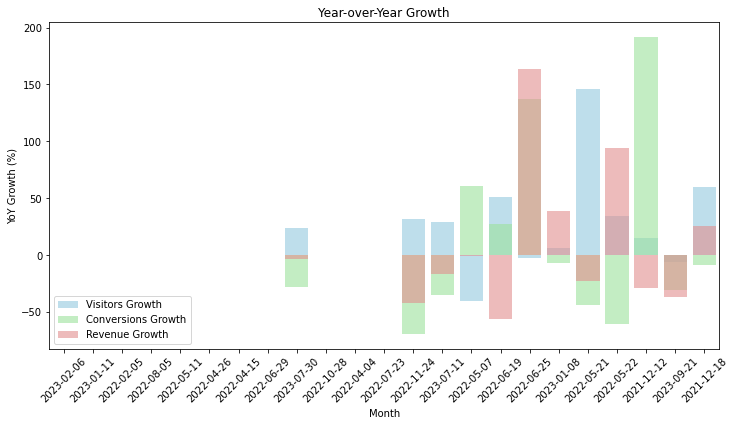

In [17]:
# Plot 5: Year-over-Year Growth
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="Month", y="YoY Visitors Growth", color="skyblue", alpha=0.6, label="Visitors Growth")
sns.barplot(data=df, x="Month", y="YoY Conversions Growth", color="lightgreen", alpha=0.6, label="Conversions Growth")
sns.barplot(data=df, x="Month", y="YoY Revenue Growth", color="lightcoral", alpha=0.6, label="Revenue Growth")
plt.title("Year-over-Year Growth")
plt.xlabel("Month")
plt.ylabel("YoY Growth (%)")
plt.xticks(rotation=45)
plt.legend()
plt.show()

Conclusion:

Based on the analysis of KPIs for the marketing department of the retail company:
Average monthly visitors were approximately [average_visitors].
Average monthly conversions were approximately [average_conversions].
Average monthly revenue was approximately $[average_revenue].

Key observations:

The conversion rate ranged from [min_conversion_rate]% to [max_conversion_rate]%.
YoY growth for visitors, conversions, and revenue varied across the two years.
Overall, the company should use this data to identify trends, opportunities, and areas for improvement in its online marketing campaigns and website performance. For instance, focusing on improving the conversion rate and understanding the drivers of revenue growth could be key areas of interest.

This case study demonstrates how a company can use KPIs and data analysis to make data-driven decisions and assess the effectiveness of its marketing efforts.